In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Importing data frame and data cleanising¶

In [2]:
kdd_train=pd.read_csv('train_kddcup.csv',header=None)

In [3]:
kdd_train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
kdd_test=pd.read_csv('test_kddcup.csv',header=None)

In [5]:
kdd_test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [6]:
kdd_train.columns = ['train_duration','train_protocol_type','train_service','train_flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','dummy','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','train_dst_host_rerror_rate','dst_bushost_srv_rerror_rate']

In [7]:
kdd_test.columns = ['test_duration','test_protocol_type','test_service','test_flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','dummy','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','test_dst_host_rerror_rate','dst_bushost_srv_rerror_rate']

In [8]:
kdd_train.head()

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
kdd_test.head()

,test_duration,test_protocol_type,test_service,test_flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,test_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [10]:
kdd_train_clean=kdd_train.drop(['wrong_fragment','urgent','num_failed_logins','num_file_creations','num_shells','dummy','num_outbound_cmds'],axis=1)

In [11]:
kdd_test_clean=kdd_test.drop(['wrong_fragment','urgent','num_failed_logins','num_file_creations','num_shells','dummy','num_outbound_cmds'],axis=1)

In [12]:
kdd_train_clean.head()

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [13]:
kdd_test_clean.head()

,test_duration,test_protocol_type,test_service,test_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,test_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [14]:
kdd_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   train_duration               125973 non-null  int64  
 1   train_protocol_type          125973 non-null  object 
 2   train_service                125973 non-null  object 
 3   train_flag                   125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   hot                          125973 non-null  int64  
 8   logged_in                    125973 non-null  int64  
 9   num_compromised              125973 non-null  int64  
 10  root_shell                   125973 non-null  int64  
 11  su_attempted                 125973 non-null  int64  
 12  num_root                     125973 non-null  int64  
 13 

In [15]:
kdd_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   test_duration                22544 non-null  int64  
 1   test_protocol_type           22544 non-null  object 
 2   test_service                 22544 non-null  object 
 3   test_flag                    22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   hot                          22544 non-null  int64  
 8   logged_in                    22544 non-null  int64  
 9   num_compromised              22544 non-null  int64  
 10  root_shell                   22544 non-null  int64  
 11  su_attempted                 22544 non-null  int64  
 12  num_root                     22544 non-null  int64  
 13  num_access_files

In [16]:
kdd_train_clean.describe()

,train_duration,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_bushost_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.204409,0.395736,0.279250,0.001342,0.001103,0.302192,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,2.149968,0.489010,23.942042,0.036603,0.045154,24.399618,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,77.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [17]:
kdd_test_clean.describe()

,test_duration,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_bushost_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.105394,0.442202,0.119899,0.002440,0.000266,0.114665,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.928428,0.496659,7.269597,0.049334,0.021060,8.041614,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,101.000000,1.000000,796.000000,1.000000,2.000000,878.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [18]:
kdd_train_clean.columns.values

array(['train_duration', 'train_protocol_type', 'train_service',
       'train_flag', 'src_bytes', 'dst_bytes', 'land', 'hot', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'train_dst_host_rerror_rate',
       'dst_bushost_srv_rerror_rate'], dtype=object)

In [19]:
kdd_test_clean.columns.values

array(['test_duration', 'test_protocol_type', 'test_service', 'test_flag',
       'src_bytes', 'dst_bytes', 'land', 'hot', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'test_dst_host_rerror_rate',
       'dst_bushost_srv_rerror_rate'], dtype=object)

In [20]:
kdd_train_clean.isnull().sum()

train_duration                 0
train_protocol_type            0
train_service                  0
train_flag                     0
src_bytes                      0
dst_bytes                      0
land                           0
hot                            0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_s

In [21]:
kdd_test_clean.isnull().sum()

test_duration                  0
test_protocol_type             0
test_service                   0
test_flag                      0
src_bytes                      0
dst_bytes                      0
land                           0
hot                            0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_s

In [22]:
kdd_train_clean.duplicated(keep='first').sum()

0

In [23]:
kdd_test_clean.duplicated(keep='first').sum()

0

In [24]:
kdd_train_clean=kdd_train_clean.drop_duplicates()

In [25]:
kdd_test_clean=kdd_test_clean.drop_duplicates()

In [26]:
kdd_train_clean.duplicated(keep='first').sum()

0

In [27]:
kdd_test_clean.duplicated(keep='first').sum()

0

<AxesSubplot:>

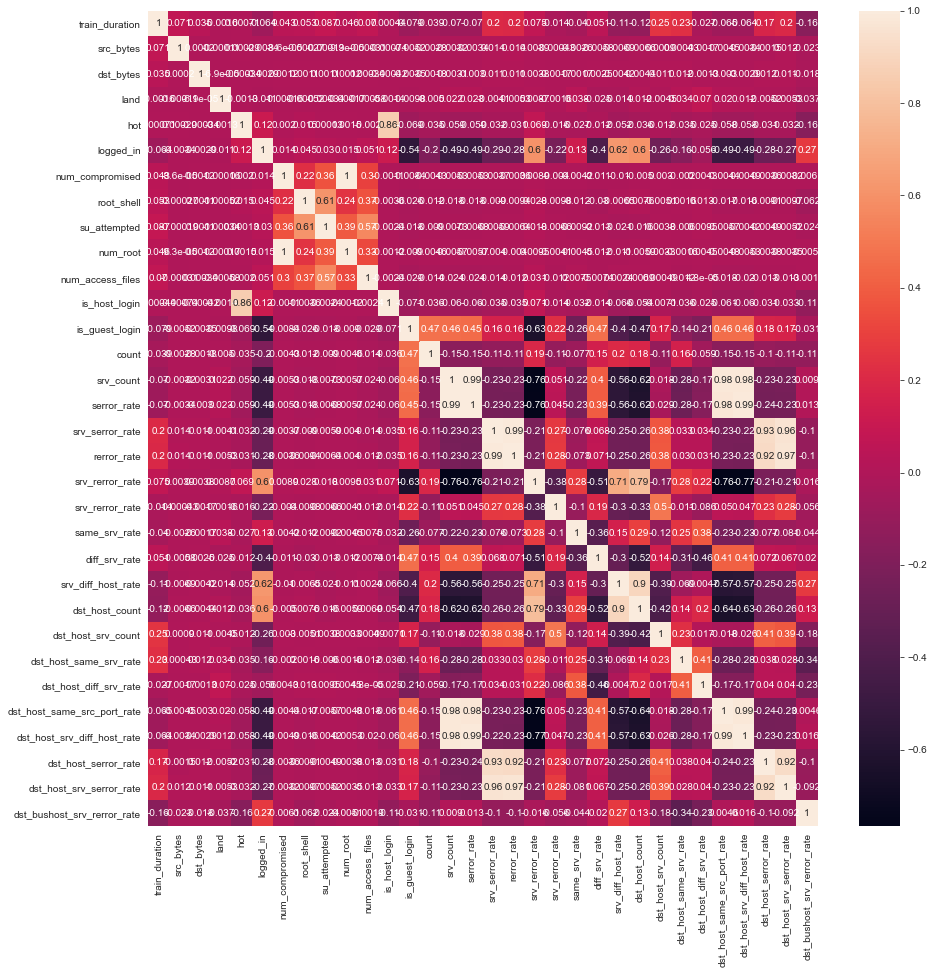

In [28]:
corr_map=kdd_train_clean.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_map, annot=True)

<AxesSubplot:>

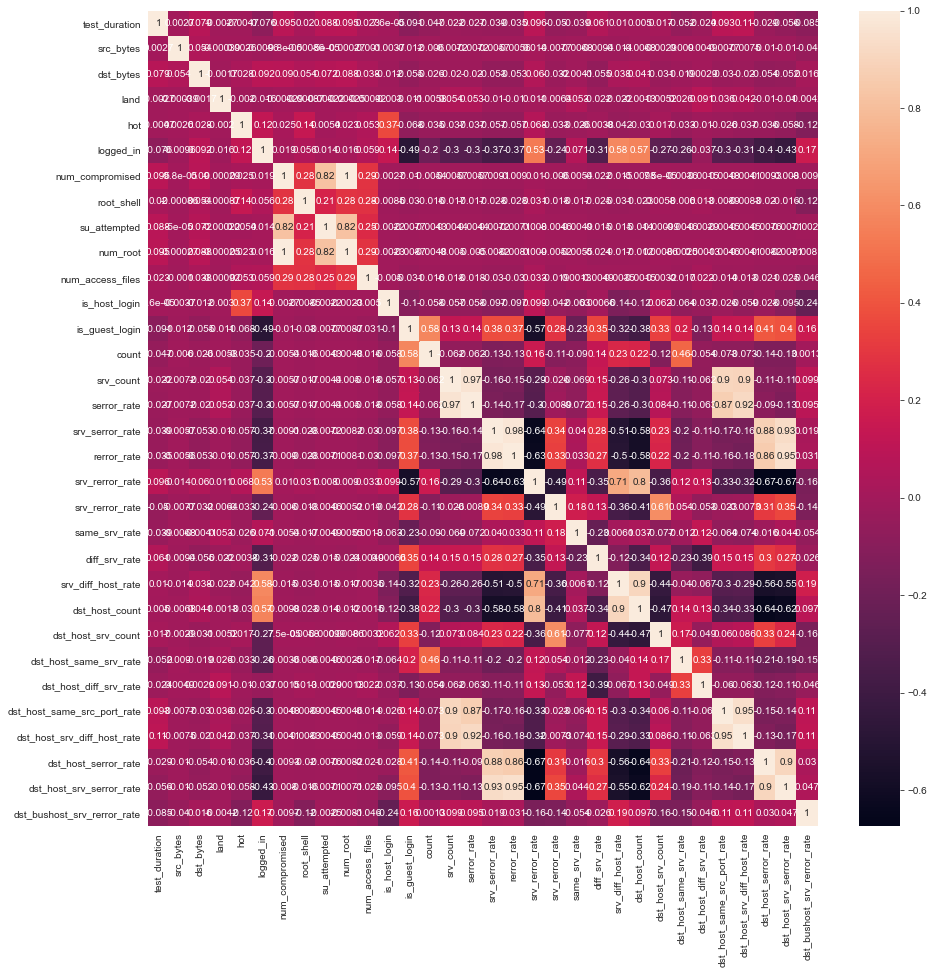

In [29]:
corr_map=kdd_test_clean.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_map, annot=True)

In [30]:
kdd_train_clean['train_protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: train_protocol_type, dtype: int64

In [31]:
kdd_test_clean['test_protocol_type'].value_counts()

tcp     18880
udp      2621
icmp     1043
Name: test_protocol_type, dtype: int64

In [32]:
kdd_train_clean['train_service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
aol              2
harvest          2
http_8001        2
http_2784        1
Name: train_service, Length: 70, dtype: int64

In [33]:
kdd_test_clean['test_service'].value_counts()

http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: test_service, Length: 64, dtype: int64

In [34]:
kdd_train_clean['train_flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: train_flag, dtype: int64

In [35]:
kdd_test_clean['test_flag'].value_counts()

SF        14875
REJ        3850
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: test_flag, dtype: int64

In [36]:
kdd_train_clean['train_dst_host_rerror_rate'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: train_dst_host_rerror_rate, dtype: int64

In [37]:
kdd_test_clean['test_dst_host_rerror_rate'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
sqlattack             2
phf                   2
worm                  2
loadmodule            2
udpstorm              2
perl                  2
imap                  1
Name: test_dst_host_rerror_rate, dtype: int64

# Data Transormation

In [38]:
train_protocol_type = {'tcp' : 0,'udp' : 1,'icmp' : 2}
train_protocol_type.items()

dict_items([('tcp', 0), ('udp', 1), ('icmp', 2)])

In [39]:
kdd_train_clean.train_protocol_type = [train_protocol_type[item] for item in kdd_train_clean.train_protocol_type]

In [40]:
kdd_train_clean.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,0,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,0,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,0,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,0,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,0,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,0,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [41]:
test_protocol_type = {'tcp' : 0,'udp' : 1,'icmp' : 2}
test_protocol_type.items()

dict_items([('tcp', 0), ('udp', 1), ('icmp', 2)])

In [42]:
kdd_test_clean.test_protocol_type = [test_protocol_type[item] for item in kdd_test_clean.test_protocol_type]

In [43]:
kdd_test_clean.head(20)

,test_duration,test_protocol_type,test_service,test_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,test_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,0,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,0,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,2,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,0,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,0,http,SF,267,14515,0,0,1,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,0,smtp,SF,1022,387,0,0,1,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,0,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,0,http,SF,327,467,0,0,1,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,0,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [44]:
train_duration = kdd_train_clean['train_duration']

'''
for i in train_duration:
    if i <= 2:
        print('good condition', i)
    else:        
        print('bad condition', i)
''' 

"\nfor i in train_duration:\n    if i <= 2:\n        print('good condition', i)\n    else:        \n        print('bad condition', i)\n"

In [45]:
kdd_train_clean['train_duration'] = np.where((kdd_train_clean.train_duration <= 2), 0, 1)

In [46]:
kdd_train_clean.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,0,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,0,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,0,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,0,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,0,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,0,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [47]:
test_duration = kdd_test_clean['test_duration']
'''
for i in test_duration:
    if i <= 2:
        print('good condition', i)
    else:
        print('bad condition', i)
'''

"\nfor i in test_duration:\n    if i <= 2:\n        print('good condition', i)\n    else:\n        print('bad condition', i)\n"

In [48]:
kdd_test_clean['test_duration'] = np.where((kdd_test_clean.test_duration <= 2), 0, 1)

In [49]:
kdd_test_clean.head(20)

,test_duration,test_protocol_type,test_service,test_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,test_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,0,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,0,0,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,2,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,0,0,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,0,http,SF,267,14515,0,0,1,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,0,smtp,SF,1022,387,0,0,1,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,0,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,0,http,SF,327,467,0,0,1,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,0,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [50]:
train_replace_map = {'normal' : "normal" , 'DOS' : ['back', 'land', 'pod', 'neptune', 'smurf', 'teardrop'], 'R2L' : ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'spy', 'phf', 'warezclient', 'warezmaster'], 'U2R' : ['buffer_overflow', 'loadmodule', 'perl', 'rootkit'], 'PROBE' : ['ipsweep', 'nmap', 'portsweep', 'satan'], 'extra new attacks' : ['apache2', 'httptunnel', 'mailbomb', 'mscan', 'named', 'processtable', 'ps', 'saint', 'sendmail', 'snmpgetattack', 'snmpguess', 'sqlattack', 'udpstorm', 'worm', 'xlock', 'xsnoop', 'xterm']}

In [51]:
kdd_train_format = kdd_train_clean.assign(train_dst_host_rerror_rate = kdd_train_clean['train_dst_host_rerror_rate'].apply(lambda x: [key for key, value in train_replace_map.items() if x in value][0]))

In [52]:
kdd_train_format.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,19
3,0,0,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,0,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21
6,0,0,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
7,0,0,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
8,0,0,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
9,0,0,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21


In [53]:
kdd_train_format['train_dst_host_rerror_rate'].values

array(['normal', 'normal', 'DOS', ..., 'normal', 'DOS', 'normal'],
      dtype=object)

In [54]:
test_replace_map = {'normal' : "normal" , 'DOS' : ['back', 'land', 'pod', 'neptune', 'smurf', 'teardrop'], 'R2L' : ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'spy', 'phf', 'warezclient', 'warezmaster'], 'U2R' : ['buffer_overflow', 'loadmodule', 'perl', 'rootkit'], 'PROBE' : ['ipsweep', 'nmap', 'portsweep', 'satan'], 'extra new attacks' : ['apache2', 'httptunnel', 'mailbomb', 'mscan', 'named', 'processtable', 'ps', 'saint', 'sendmail', 'snmpgetattack', 'snmpguess', 'sqlattack', 'udpstorm', 'worm', 'xlock', 'xsnoop', 'xterm']}

In [55]:
kdd_test_format = kdd_test_clean.assign(test_dst_host_rerror_rate = kdd_test_clean['test_dst_host_rerror_rate'].apply(lambda x: [key for key, value in test_replace_map.items() if x in value][0]))

In [56]:
kdd_test_format.head(20)

,test_duration,test_protocol_type,test_service,test_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,test_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21
1,0,0,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21
2,0,0,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,2,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,extra new attacks,15
4,0,0,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,extra new attacks,11
5,0,0,http,SF,267,14515,0,0,1,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,0,smtp,SF,1022,387,0,0,1,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,0,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,R2L,15
8,0,0,http,SF,327,467,0,0,1,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,0,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,R2L,7


In [57]:
train_service = {'aol' : 1,'auth' : 2,'bgp' : 3, 'courier' : 4, 'csnet_ns' : 5, 'ctf' : 6, 'daytime' : 7, 'discard' : 8, 'domain' : 9, 'domain_u' : 10, 'echo' : 11, 'eco_i' : 12, 'ecr_i' : 13, 'efs' : 14, 'exec' : 15, 'finger' : 16, 'ftp' : 17, 'ftp_data' : 18, 'gopher' : 19, 'harvest' : 20, 'hostnames' : 21, 'http' : 22, 'http_2784' : 23, 'http_443' : 24, 'http_8001' : 25, 'imap4' : 26, 'IRC' : 27, 'iso_tsap' : 28, 'klogin' : 29, 'kshell' : 30, 'ldap' : 31, 'link' : 32, 'login' : 33, 'mtp' : 34, 'name' : 35, 'netbios_dgm' : 36, 'netbios_ns' : 37, 'netbios_ssn' : 38, 'netstat' : 39, 'nnsp' : 40, 'nntp' : 41, 'ntp_u' : 42, 'other' : 43, 'pm_dump' : 44, 'pop_2' : 45, 'pop_3' : 46, 'printer' : 47, 'private' : 48, 'red_i' : 49, 'remote_job' : 50, 'rje' : 51, 'shell' : 52, 'smtp' : 53, 'sql_net' : 54, 'ssh' : 55, 'sunrpc' : 56, 'supdup' : 57, 'systat' : 58, 'telnet' : 59, 'tftp_u' : 60, 'tim_i' : 61, 'time' : 62, 'urh_i' : 63, 'urp_i' : 64, 'uucp' : 65, 'uucp_path' : 66, 'vmnet' : 67, 'whois' : 68, 'X11' : 69, 'Z39_50' : 70}
train_service.items()

dict_items([('aol', 1), ('auth', 2), ('bgp', 3), ('courier', 4), ('csnet_ns', 5), ('ctf', 6), ('daytime', 7), ('discard', 8), ('domain', 9), ('domain_u', 10), ('echo', 11), ('eco_i', 12), ('ecr_i', 13), ('efs', 14), ('exec', 15), ('finger', 16), ('ftp', 17), ('ftp_data', 18), ('gopher', 19), ('harvest', 20), ('hostnames', 21), ('http', 22), ('http_2784', 23), ('http_443', 24), ('http_8001', 25), ('imap4', 26), ('IRC', 27), ('iso_tsap', 28), ('klogin', 29), ('kshell', 30), ('ldap', 31), ('link', 32), ('login', 33), ('mtp', 34), ('name', 35), ('netbios_dgm', 36), ('netbios_ns', 37), ('netbios_ssn', 38), ('netstat', 39), ('nnsp', 40), ('nntp', 41), ('ntp_u', 42), ('other', 43), ('pm_dump', 44), ('pop_2', 45), ('pop_3', 46), ('printer', 47), ('private', 48), ('red_i', 49), ('remote_job', 50), ('rje', 51), ('shell', 52), ('smtp', 53), ('sql_net', 54), ('ssh', 55), ('sunrpc', 56), ('supdup', 57), ('systat', 58), ('telnet', 59), ('tftp_u', 60), ('tim_i', 61), ('time', 62), ('urh_i', 63), ('ur

In [58]:
kdd_train_format.train_service = [train_service[item] for item in kdd_train_format.train_service]

In [59]:
kdd_train_format.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,18,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,43,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,48,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,19
3,0,0,22,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,22,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,0,48,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21
6,0,0,48,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
7,0,0,48,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
8,0,0,50,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
9,0,0,48,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21


In [60]:
test_service = {'auth' : 1, 'bgp' : 2, 'courier' : 3, 'csnet_ns' : 4, 'ctf' : 5, 'daytime' : 6, 'discard' : 7, 'domain' : 8, 'domain_u' : 9, 'echo' : 10, 'eco_i' : 11, 'ecr_i' : 12, 'efs' : 13, 'exec' : 14, 'finger' : 15, 'ftp' : 16, 'ftp_data' : 17, 'gopher' : 18, 'hostnames' : 19, 'http' : 20, 'http_443' : 21, 'imap4' : 22, 'IRC' : 23, 'iso_tsap' : 24, 'klogin' : 25, 'kshell' : 26, 'ldap' : 27, 'link' : 28, 'login' : 29, 'mtp' : 30, 'name' : 31, 'netbios_dgm' : 3, 'netbios_ns' : 33, 'netbios_ssn' : 34, 'netstat' : 35, 'nnsp' : 36, 'nntp' : 37, 'ntp_u' : 38, 'other' : 39, 'pm_dump' : 40, 'pop_2' : 41, 'pop_3' : 42, 'printer' : 43, 'private' : 44, 'remote_job' : 45, 'rje' : 46, 'shell' : 47, 'smtp' : 48, 'sql_net' : 49, 'ssh' : 50, 'sunrpc' : 51, 'supdup' : 52, 'systat' : 53, 'telnet' : 54, 'tftp_u' : 55, 'tim_i' : 56, 'time' : 57, 'urp_i' : 58, 'uucp' : 59, 'uucp_path' : 60, 'vmnet' : 61, 'whois' : 62, 'X11' : 63, 'Z39_50' : 64}
test_service.items()

dict_items([('auth', 1), ('bgp', 2), ('courier', 3), ('csnet_ns', 4), ('ctf', 5), ('daytime', 6), ('discard', 7), ('domain', 8), ('domain_u', 9), ('echo', 10), ('eco_i', 11), ('ecr_i', 12), ('efs', 13), ('exec', 14), ('finger', 15), ('ftp', 16), ('ftp_data', 17), ('gopher', 18), ('hostnames', 19), ('http', 20), ('http_443', 21), ('imap4', 22), ('IRC', 23), ('iso_tsap', 24), ('klogin', 25), ('kshell', 26), ('ldap', 27), ('link', 28), ('login', 29), ('mtp', 30), ('name', 31), ('netbios_dgm', 3), ('netbios_ns', 33), ('netbios_ssn', 34), ('netstat', 35), ('nnsp', 36), ('nntp', 37), ('ntp_u', 38), ('other', 39), ('pm_dump', 40), ('pop_2', 41), ('pop_3', 42), ('printer', 43), ('private', 44), ('remote_job', 45), ('rje', 46), ('shell', 47), ('smtp', 48), ('sql_net', 49), ('ssh', 50), ('sunrpc', 51), ('supdup', 52), ('systat', 53), ('telnet', 54), ('tftp_u', 55), ('tim_i', 56), ('time', 57), ('urp_i', 58), ('uucp', 59), ('uucp_path', 60), ('vmnet', 61), ('whois', 62), ('X11', 63), ('Z39_50', 6

In [61]:
kdd_test_format.test_service = [test_service[item] for item in kdd_test_format.test_service]

In [62]:
kdd_test_format.head(20)

,test_duration,test_protocol_type,test_service,test_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,test_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,44,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21
1,0,0,44,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21
2,0,0,17,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,2,11,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,extra new attacks,15
4,0,0,54,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,extra new attacks,11
5,0,0,20,SF,267,14515,0,0,1,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,0,48,SF,1022,387,0,0,1,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,0,54,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,R2L,15
8,0,0,20,SF,327,467,0,0,1,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,0,16,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,R2L,7


In [63]:
train_dst_host_rerror_rate = {'normal' : 0, 'DOS' : 1, 'R2L' : 2, 'U2R' : 3, 'PROBE' : 4}
train_dst_host_rerror_rate.items()

dict_items([('normal', 0), ('DOS', 1), ('R2L', 2), ('U2R', 3), ('PROBE', 4)])

In [64]:
kdd_train_format.train_dst_host_rerror_rate = [train_dst_host_rerror_rate[item] for item in kdd_train_format.train_dst_host_rerror_rate]

In [65]:
kdd_train_format.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,18,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,1,43,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,0,48,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,0,22,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,0,22,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
5,0,0,48,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,21
6,0,0,48,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,21
7,0,0,48,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1,21
8,0,0,50,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,21
9,0,0,48,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,21


In [66]:
test_dst_host_rerror_rate = {'normal' : 0, 'DOS' : 1, 'R2L' : 2, 'U2R' : 3, 'PROBE' : 4, 'extra new attacks' : 5}
test_dst_host_rerror_rate.items()

dict_items([('normal', 0), ('DOS', 1), ('R2L', 2), ('U2R', 3), ('PROBE', 4), ('extra new attacks', 5)])

In [67]:
kdd_test_format.test_dst_host_rerror_rate = [test_dst_host_rerror_rate[item] for item in kdd_test_format.test_dst_host_rerror_rate]

In [68]:
kdd_test_format.head(20)

,test_duration,test_protocol_type,test_service,test_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,test_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,44,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1,21
1,0,0,44,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1,21
2,0,0,17,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0,21
3,0,2,11,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,5,15
4,0,0,54,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,5,11
5,0,0,20,SF,267,14515,0,0,1,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0,21
6,0,0,48,SF,1022,387,0,0,1,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0,21
7,0,0,54,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,2,15
8,0,0,20,SF,327,467,0,0,1,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0,21
9,0,0,16,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,2,7


In [69]:
train_flag = {'SF' : 0,'S0' : 1,'REJ' : 2,'RSTR' : 3, 'RSTO' : 4, 'S1' : 5, 'SH' : 6, 'S2' : 7, 'RSTOS0' : 8, 'S3' : 9, 'OTH' : 10}
train_flag.items()

dict_items([('SF', 0), ('S0', 1), ('REJ', 2), ('RSTR', 3), ('RSTO', 4), ('S1', 5), ('SH', 6), ('S2', 7), ('RSTOS0', 8), ('S3', 9), ('OTH', 10)])

In [70]:
kdd_train_format.train_flag = [train_flag[item] for item in kdd_train_format.train_flag]

In [71]:
kdd_train_format.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,18,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,1,43,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,0,48,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,0,22,0,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,0,22,0,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
5,0,0,48,2,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,21
6,0,0,48,1,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,21
7,0,0,48,1,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1,21
8,0,0,50,1,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,21
9,0,0,48,1,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,21


In [72]:
test_flag = {'SF' : 0,'S0' : 1,'REJ' : 2,'RSTR' : 3, 'RSTO' : 4, 'S1' : 5, 'SH' : 6, 'S2' : 7, 'RSTOS0' : 8, 'S3' : 9, 'OTH' : 10}

In [73]:
kdd_test_format.test_flag = [test_flag[item] for item in kdd_test_format.test_flag]

In [74]:
kdd_test_format.head(20)

,test_duration,test_protocol_type,test_service,test_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,test_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,0,44,2,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1,21
1,0,0,44,2,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1,21
2,0,0,17,0,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0,21
3,0,2,11,0,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,5,15
4,0,0,54,4,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,5,11
5,0,0,20,0,267,14515,0,0,1,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0,21
6,0,0,48,0,1022,387,0,0,1,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0,21
7,0,0,54,0,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,2,15
8,0,0,20,0,327,467,0,0,1,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0,21
9,0,0,16,0,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,2,7


In [75]:
# Creating plot
# plt.boxplot(kdd_train_format)

In [76]:
# plt.boxplot(kdd_test_format)

In [77]:
X_train =kdd_train_format.drop(labels=['train_dst_host_rerror_rate'], axis=1)
y_train = kdd_train_format['train_dst_host_rerror_rate'].values

In [78]:
x1,y1 = scale(X_train),y_train

In [79]:
x1

array([[-0.24595698, -0.44346643, -0.72047576, ..., -0.22453241,
        -0.37638703,  0.21642633],
       [-0.24595698,  1.32580661,  0.75882511, ..., -0.38763462,
        -0.37638703, -1.9655564 ],
       [-0.24595698, -0.44346643,  1.05468528, ..., -0.38763462,
        -0.37638703, -0.21997022],
       ...,
       [-0.24595698, -0.44346643,  1.35054545, ..., -0.35501418,
        -0.37638703, -0.65636676],
       [-0.24595698, -0.44346643, -0.06958338, ..., -0.38763462,
        -0.37638703,  0.21642633],
       [-0.24595698, -0.44346643, -0.72047576, ..., -0.38763462,
        -0.37638703,  0.65282288]])

In [80]:
x1.shape

(125973, 35)

In [81]:
y1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [82]:
X_test =kdd_test_format.drop(labels=['test_dst_host_rerror_rate'], axis=1)
y_test = kdd_test_format['test_dst_host_rerror_rate'].values

In [83]:
x2,y2 = scale(X_test),y_test

In [84]:
x2

array([[-0.37934279, -0.41127519,  0.92955491, ...,  1.97979091,
         1.9291162 ,  0.69832537],
       [-0.37934279, -0.41127519,  0.92955491, ...,  1.97979091,
         1.9291162 ,  0.69832537],
       [-0.37934279, -0.41127519, -0.89376478, ..., -0.60271888,
        -0.56548308,  0.69832537],
       ...,
       [-0.37934279, -0.41127519, -0.6911737 , ..., -0.4219432 ,
        -0.39086113, -0.7067393 ],
       [-0.37934279,  1.55851193, -1.43400765, ..., -0.60271888,
        -0.56548308,  0.69832537],
       [-0.37934279, -0.41127519,  1.40226742, ...,  0.53358543,
         1.9291162 , -0.94091675]])

In [85]:
x2.shape

(22544, 35)

In [86]:
y2

array([1, 1, 0, ..., 1, 0, 5], dtype=int64)

In [87]:
results=[]

# Support vector machine

In [88]:
svm = SVC(kernel = 'linear', C = 1, gamma = 1)

In [89]:
unique, counts = np.unique(y1, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 67343]
 [    1 45927]
 [    2   995]
 [    3    52]
 [    4 11656]]


In [90]:
x1

array([[-0.24595698, -0.44346643, -0.72047576, ..., -0.22453241,
        -0.37638703,  0.21642633],
       [-0.24595698,  1.32580661,  0.75882511, ..., -0.38763462,
        -0.37638703, -1.9655564 ],
       [-0.24595698, -0.44346643,  1.05468528, ..., -0.38763462,
        -0.37638703, -0.21997022],
       ...,
       [-0.24595698, -0.44346643,  1.35054545, ..., -0.35501418,
        -0.37638703, -0.65636676],
       [-0.24595698, -0.44346643, -0.06958338, ..., -0.38763462,
        -0.37638703,  0.21642633],
       [-0.24595698, -0.44346643, -0.72047576, ..., -0.38763462,
        -0.37638703,  0.65282288]])

In [91]:
svm.fit(x1, y1)

SVC(C=1, gamma=1, kernel='linear')

In [92]:
svm.score(x1,y1)

0.9851079199511006

In [93]:
svm.fit(x2, y2)

SVC(C=1, gamma=1, kernel='linear')

In [94]:
#svm.score(x2,y2)

In [95]:
y_pred = svm.predict(x2) 

In [96]:
y_pred

array([1, 1, 0, ..., 1, 0, 5], dtype=int64)

In [97]:
unique, counts = np.unique(y2, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 9711]
 [   1 5741]
 [   2 2199]
 [   3   37]
 [   4 1106]
 [   5 3750]]


In [98]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 9509]
 [   1 5706]
 [   2 2300]
 [   3   26]
 [   4 1283]
 [   5 3720]]


In [99]:
accuracy=metrics.accuracy_score(y2, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.9614975159687722


In [100]:
from sklearn.metrics import classification_report, confusion_matrix  

In [101]:
print(confusion_matrix(y2, y_pred))

[[9402   37   26    0    7  239]
 [  32 5654    3    0   20   32]
 [  12    1 2148    1    0   37]
 [   0    0   12   20    0    5]
 [  21    1    1    0 1064   19]
 [  42   13  110    5  192 3388]]


In [102]:
print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9711
           1       0.99      0.98      0.99      5741
           2       0.93      0.98      0.95      2199
           3       0.77      0.54      0.63        37
           4       0.83      0.96      0.89      1106
           5       0.91      0.90      0.91      3750

    accuracy                           0.96     22544
   macro avg       0.90      0.89      0.89     22544
weighted avg       0.96      0.96      0.96     22544



# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rclf = RandomForestClassifier(n_estimators=100)  
rclf.fit(x1, y1)
y_pred = rclf.predict(x2)

In [105]:
print(confusion_matrix(y2, y_pred))

[[9375   21    0    0  315    0]
 [ 883 4740    0    0  118    0]
 [2073    0    0    0  126    0]
 [  34    0    0    0    3    0]
 [   3    0    0    0 1103    0]
 [2328  519    0    0  903    0]]


In [106]:
print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      9711
           1       0.90      0.83      0.86      5741
           2       0.00      0.00      0.00      2199
           3       0.00      0.00      0.00        37
           4       0.43      1.00      0.60      1106
           5       0.00      0.00      0.00      3750

    accuracy                           0.68     22544
   macro avg       0.33      0.46      0.37     22544
weighted avg       0.52      0.68      0.58     22544



c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
accuracy=metrics.accuracy_score(y2, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.6750354861603974


Decision Tree Classifier

In [108]:
dt = DecisionTreeClassifier()  
dt.fit(x1, y1)
y_pred = dt.predict(x2)

In [109]:
print(confusion_matrix(y2, y_pred))

[[7859 1218    6    0  628    0]
 [ 771 4840   26    0  104    0]
 [ 391 1113    6    0  689    0]
 [  18   12    1    0    6    0]
 [  19  171    0    0  916    0]
 [ 755 1858    1    0 1136    0]]


In [110]:
print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      9711
           1       0.53      0.84      0.65      5741
           2       0.15      0.00      0.01      2199
           3       0.00      0.00      0.00        37
           4       0.26      0.83      0.40      1106
           5       0.00      0.00      0.00      3750

    accuracy                           0.60     22544
   macro avg       0.29      0.41      0.31     22544
weighted avg       0.51      0.60      0.53     22544



c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
accuracy=metrics.accuracy_score(y2, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.6041962384669979


KNeighborsClassifier

In [112]:
knn = KNeighborsClassifier()  
knn .fit(x1, y1)
y_pred = knn.predict(x2)

In [113]:
print(confusion_matrix(y2, y_pred))

[[9485   48    6    0  172    0]
 [ 206 5496    0    0   39    0]
 [2064   60   52    0   23    0]
 [  28    1    2    6    0    0]
 [ 261    9    0    0  836    0]
 [2318  515   12    4  901    0]]


In [114]:
print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79      9711
           1       0.90      0.96      0.93      5741
           2       0.72      0.02      0.05      2199
           3       0.60      0.16      0.26        37
           4       0.42      0.76      0.54      1106
           5       0.00      0.00      0.00      3750

    accuracy                           0.70     22544
   macro avg       0.55      0.48      0.43     22544
weighted avg       0.61      0.70      0.61     22544



c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
accuracy=metrics.accuracy_score(y2, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.7041784953867991


Gaussian Naive Bayes classifier

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
# training the model on training set
gnb = GaussianNB()
gnb.fit(x1, y1)
y_pred = gnb.predict(x2)

In [118]:
print(confusion_matrix(y2, y_pred))

[[9699    0    0    0   12    0]
 [5741    0    0    0    0    0]
 [2198    0    0    0    1    0]
 [  37    0    0    0    0    0]
 [1106    0    0    0    0    0]
 [3747    0    0    0    3    0]]


In [119]:
print(classification_report(y2, y_pred))

c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.43      1.00      0.60      9711
           1       0.00      0.00      0.00      5741
           2       0.00      0.00      0.00      2199
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00      1106
           5       0.00      0.00      0.00      3750

    accuracy                           0.43     22544
   macro avg       0.07      0.17      0.10     22544
weighted avg       0.19      0.43      0.26     22544



c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
accuracy=metrics.accuracy_score(y2, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.4302253371185238


In [121]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x1, y1)
y_pred = xgb.predict(x2)

In [122]:
print(confusion_matrix(y2, y_pred))

[[9227  125    0    0  359    0]
 [ 927 4703    0    0  111    0]
 [1585  433   12    1  168    0]
 [  15    9    0    6    7    0]
 [   1    0    0    0 1105    0]
 [1455 1368    0    7  920    0]]


In [123]:
print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81      9711
           1       0.71      0.82      0.76      5741
           2       1.00      0.01      0.01      2199
           3       0.43      0.16      0.24        37
           4       0.41      1.00      0.59      1106
           5       0.00      0.00      0.00      3750

    accuracy                           0.67     22544
   macro avg       0.54      0.49      0.40     22544
weighted avg       0.60      0.67      0.57     22544



c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
accuracy=metrics.accuracy_score(y2, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.6677164655784245


In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
lr = LogisticRegression()
lr.fit(x1, y1)
y_pred = lr.predict(x2)

c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [127]:
print(confusion_matrix(y2, y_pred))

[[8938  566    1    0  206    0]
 [  21 5683    0    0   37    0]
 [2089   67    5    0   38    0]
 [   9   19    0    6    3    0]
 [  17  179    0    0  910    0]
 [1839 1051    6    4  850    0]]


In [128]:
print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79      9711
           1       0.75      0.99      0.85      5741
           2       0.42      0.00      0.00      2199
           3       0.60      0.16      0.26        37
           4       0.45      0.82      0.58      1106
           5       0.00      0.00      0.00      3750

    accuracy                           0.69     22544
   macro avg       0.48      0.48      0.41     22544
weighted avg       0.55      0.69      0.59     22544



c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
accuracy=metrics.accuracy_score(y2, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.6894073811213627


In [130]:
from sklearn.neural_network import MLPClassifier

In [131]:
nn = MLPClassifier()
nn.fit(x1, y1)
y_pred = nn.predict(x2)

In [132]:
print(confusion_matrix(y2, y_pred))

[[8916  560    2    0  233    0]
 [  11 5693    0    0   37    0]
 [2075    5   40    1   78    0]
 [  29    2    0    5    1    0]
 [  10   76    0    0 1020    0]
 [2229  725   50    7  739    0]]


In [133]:
print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78      9711
           1       0.81      0.99      0.89      5741
           2       0.43      0.02      0.03      2199
           3       0.38      0.14      0.20        37
           4       0.48      0.92      0.63      1106
           5       0.00      0.00      0.00      3750

    accuracy                           0.70     22544
   macro avg       0.46      0.50      0.42     22544
weighted avg       0.56      0.70      0.60     22544



c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nagas\anaconda3\envs\tfod1.4_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
accuracy=metrics.accuracy_score(y2, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.6952625975869411


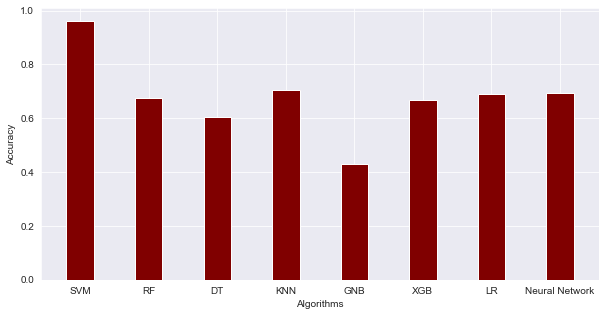

In [135]:
algorithms =['SVM','RF','DT','KNN','GNB','XGB','LR','Neural Network']
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algorithms,results, color ='maroon', width = 0.4)
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

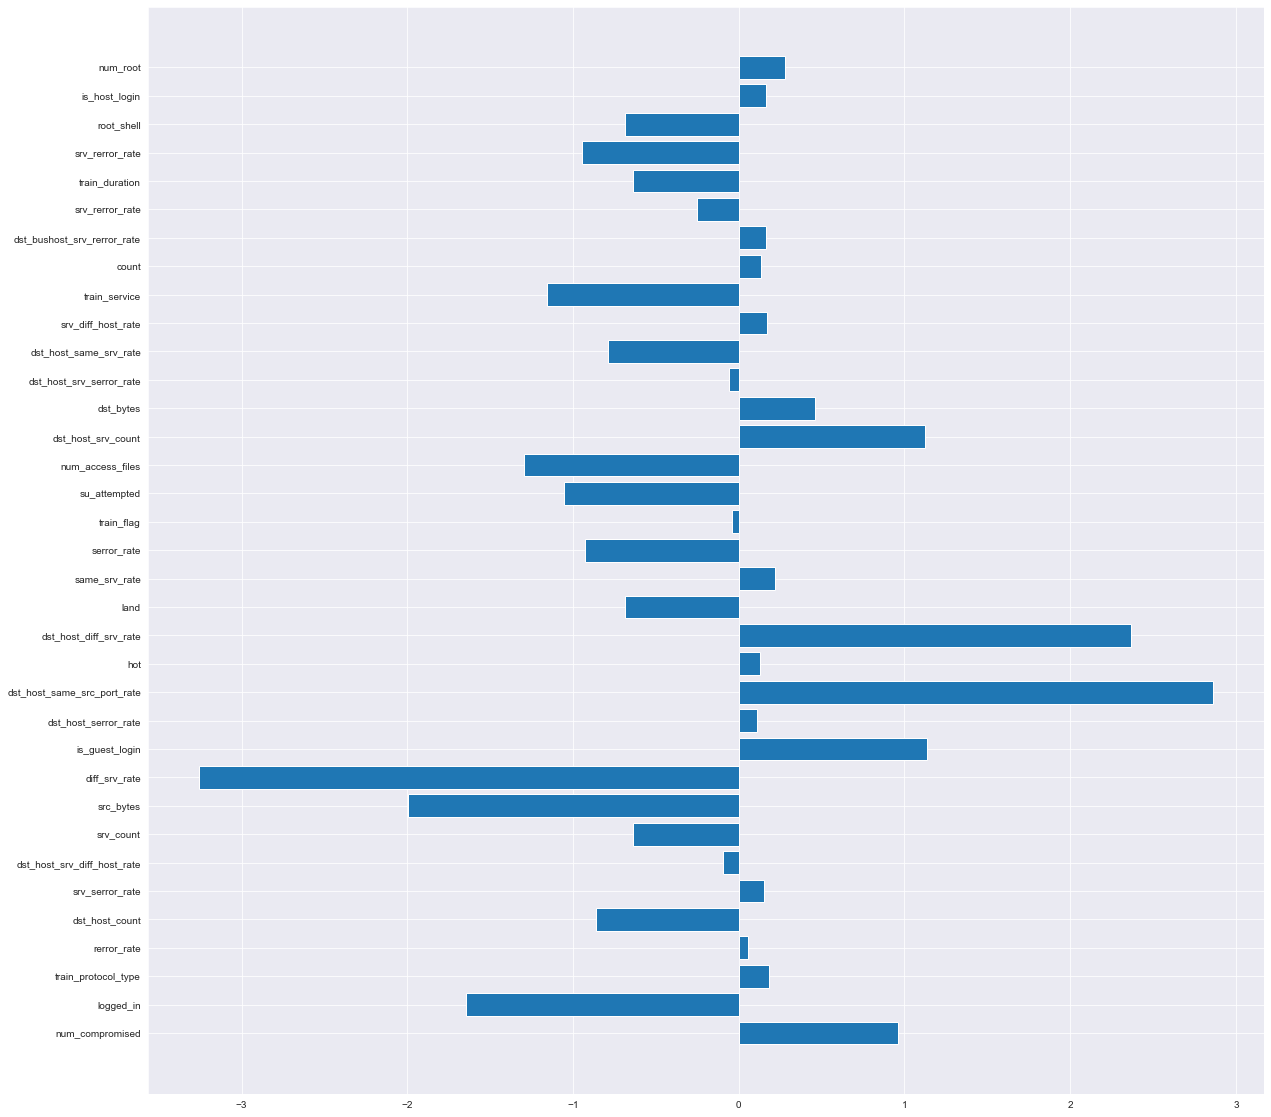

In [136]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef.tolist()[0]
    names = [names for _,names in sorted(zip(imp,names))]
    
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(20)

    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['train_duration', 'train_protocol_type', 'train_service',
       'train_flag', 'src_bytes', 'dst_bytes', 'land', 'hot', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate','dst_bushost_srv_rerror_rate']

f_importances(svm.coef_, features_names)

In [137]:
import pickle

In [138]:
pickle.dump(svm,open('svm_model.pickle', 'wb'))

In [139]:
print([kdd_train_format.iloc[0].values])
print([kdd_train_format.iloc[1].values])
print([kdd_train_format.iloc[2].values])
print([kdd_train_format.iloc[3].values])

[array([0.00e+00, 0.00e+00, 1.80e+01, 0.00e+00, 4.91e+02, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 2.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       1.50e+02, 2.50e+01, 1.70e-01, 3.00e-02, 1.70e-01, 0.00e+00,
       0.00e+00, 0.00e+00, 5.00e-02, 0.00e+00, 0.00e+00, 2.00e+01])]
[array([0.00e+00, 1.00e+00, 4.30e+01, 0.00e+00, 1.46e+02, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 1.30e+01, 1.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 8.00e-02, 1.50e-01, 0.00e+00,
       2.55e+02, 1.00e+00, 0.00e+00, 6.00e-01, 8.80e-01, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.50e+01])]
[array([0.00e+00, 0.00e+00, 4.80e+01, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 1.23e+02, 6.00e+00

In [140]:
svm = pickle.load(open('svm_model.pickle', 'rb'))

for i in range(len(kdd_train_format)):
    testrec=[kdd_train_format.iloc[i].values][0].tolist()
    #print(testrec)
    #print(type(testrec))
    #print(testrec[-2])
    actual=testrec[-2]
    del testrec[-2]
    #print(testrec)

    result=svm.predict([testrec])
    print(actual,result)

0.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
2.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
2.0 [5]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]


1.0 [4]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [3]
4.0 [5]
1.0 [4]
1.0 [1]
0.0 [5]
4.0 [4]
1.0 [4]
2.0 [1]
0.0 [0]
1.0 [1]
1.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
0.0 [4]
0.0 [5]
4.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [4]
1.0 [0]
1.0 [4]
4.0 [4]
1.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [4]
4.0 [5]
1.0 [4]
0.0 [5]
2.0 [1]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]


1.0 [4]
0.0 [5]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
4.0 [5]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
4.0 [4]
0.0 [4]
1.0 [1]
4.0 [1]
0.0 [5]
0.0 [1]
0.0 [5]
0.0 [0]
4.0 [5]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [1]
4.0 [4]
0.0 [0]
4.0 [5]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [1]
1.0 [4]
2.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [4]
0.0 [3]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]


0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [5]
1.0 [1]
0.0 [0]
0.0 [4]
0.0 [4]
1.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
4.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [1]
1.0 [4]
4.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [5]
0.0 [5]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [5]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
4.0 [5]
4.0 [2]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [5]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
4.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]


0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [4]
0.0 [4]
0.0 [0]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [5]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [5]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [1]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [5]
3.0 [0]
4.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [4]
1.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [4]


0.0 [1]
0.0 [0]
4.0 [4]
0.0 [1]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [4]
0.0 [1]
0.0 [0]
4.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [5]
4.0 [0]
0.0 [0]
4.0 [1]
0.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [4]
0.0 [5]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [1]
0.0 [5]
1.0 [1]
0.0 [5]
4.0 [5]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]


0.0 [5]
0.0 [3]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [4]
1.0 [4]
4.0 [4]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [5]
2.0 [1]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [5]
0.0 [0]
4.0 [4]
4.0 [4]
0.0 [0]
0.0 [5]
0.0 [5]
0.0 [5]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]


1.0 [5]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
4.0 [5]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
4.0 [2]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [1]
4.0 [5]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [5]
0.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [3]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [4]
1.0 [1]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [5]
4.0 [0]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]


0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [4]
0.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [5]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
2.0 [5]
0.0 [0]
0.0 [4]
4.0 [4]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [5]
1.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
4.0 [5]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
4.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [5]
0.0 [1]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
4.0 [5]


0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [1]
1.0 [4]
4.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [1]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
4.0 [4]
1.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [5]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
2.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [5]
0.0 [5]
0.0 [0]
0.0 [0]
2.0 [1]
0.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [1]


0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [0]
1.0 [4]
1.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
4.0 [5]
0.0 [5]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
4.0 [4]
4.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [4]
4.0 [4]
0.0 [1]
0.0 [1]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [3]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
4.0 [2]
4.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]


1.0 [1]
0.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [5]
0.0 [5]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [1]
0.0 [5]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [1]
2.0 [1]
0.0 [0]
4.0 [0]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
4.0 [4]
0.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
4.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]


1.0 [4]
2.0 [5]
0.0 [1]
1.0 [1]
0.0 [1]
0.0 [0]
4.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
2.0 [1]
0.0 [0]
2.0 [5]
1.0 [4]
1.0 [4]
4.0 [4]
4.0 [5]
0.0 [5]
0.0 [5]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
2.0 [1]
0.0 [5]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
4.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]


1.0 [1]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
2.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]


1.0 [1]
0.0 [5]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
4.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
4.0 [5]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
1.0 [4]
3.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [1]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]


0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
4.0 [4]
2.0 [1]
0.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [5]
0.0 [5]
0.0 [0]
0.0 [4]
0.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
4.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
1.0 [4]
2.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [2]
1.0 [1]
1.0 [1]
1.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
2.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [1]
4.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]


0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [5]
1.0 [1]
0.0 [0]
4.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [4]
4.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [4]
1.0 [1]
0.0 [0]
1.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
4.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [3]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]


1.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [4]
1.0 [1]
1.0 [4]
1.0 [1]
4.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
4.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [5]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [5]
1.0 [4]
4.0 [4]
0.0 [4]
4.0 [0]
4.0 [0]
4.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [5]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [1]
1.0 [4]


0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
4.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [4]
4.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [1]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
4.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [5]
4.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
2.0 [1]
0.0 [0]
1.0 [1]
0.0 [4]
4.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [4]
4.0 [4]
1.0 [1]
1.0 [1]
1.0 [4]


1.0 [4]
1.0 [1]
1.0 [1]
0.0 [5]
1.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [5]
1.0 [4]
0.0 [5]
4.0 [4]
4.0 [4]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
1.0 [1]
0.0 [0]
2.0 [1]
1.0 [1]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [1]
4.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [5]
0.0 [3]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
4.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]


0.0 [1]
1.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
4.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
4.0 [1]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [5]
0.0 [2]
1.0 [1]
0.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [1]
0.0 [5]
0.0 [5]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
2.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]


1.0 [1]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
4.0 [5]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
4.0 [0]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [1]
0.0 [4]
0.0 [1]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
2.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
4.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [5]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
4.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]


1.0 [4]
0.0 [5]
4.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [5]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
2.0 [1]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [5]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
2.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [0]
1.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [1]
1.0 [4]
4.0 [4]
4.0 [0]
1.0 [1]
1.0 [4]
4.0 [4]
1.0 [1]
1.0 [4]
1.0 [5]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
4.0 [1]
0.0 [1]
1.0 [1]
0.0 [5]
1.0 [1]
1.0 [4]
4.0 [1]
4.0 [4]
4.0 [1]
0.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [5]
4.0 [4]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
2.0 [1]
0.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]


0.0 [1]
0.0 [0]
0.0 [4]
1.0 [1]
1.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
4.0 [5]
1.0 [1]
0.0 [1]
0.0 [0]
4.0 [0]
4.0 [0]
4.0 [4]
0.0 [5]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
2.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [5]
1.0 [4]
0.0 [1]
4.0 [5]
0.0 [1]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [4]
1.0 [4]
2.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [1]
0.0 [4]
4.0 [4]
4.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]


4.0 [0]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [1]
4.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
4.0 [4]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [5]
1.0 [1]
1.0 [1]
0.0 [0]
4.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [4]
4.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [2]
0.0 [5]
1.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [4]
0.0 [0]


1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [4]
0.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [3]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [3]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
2.0 [1]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]


1.0 [4]
0.0 [4]
0.0 [0]
1.0 [1]
0.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [2]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
2.0 [5]
0.0 [4]
1.0 [1]
0.0 [0]
2.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
4.0 [4]
1.0 [1]
1.0 [4]
1.0 [5]
0.0 [0]
4.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
4.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]


0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
2.0 [3]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [0]
0.0 [3]
1.0 [4]
4.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [1]
0.0 [1]
1.0 [4]
3.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [4]
1.0 [1]
0.0 [1]
0.0 [3]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]


4.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [5]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [4]
1.0 [1]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [5]
4.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
2.0 [1]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
4.0 [2]
1.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [4]
4.0 [4]
4.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
4.0 [4]
0.0 [5]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]


0.0 [0]
1.0 [1]
1.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
2.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [5]
1.0 [1]
1.0 [1]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
2.0 [3]
1.0 [1]
2.0 [1]
1.0 [1]
1.0 [4]
4.0 [0]
0.0 [4]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
4.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [5]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]


0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [1]
1.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [5]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
4.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
2.0 [5]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [5]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
4.0 [2]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]


1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [3]
0.0 [0]
2.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [4]
4.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [3]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [3]
0.0 [5]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
4.0 [2]
0.0 [0]
1.0 [5]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [4]


0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
4.0 [5]
0.0 [0]
1.0 [4]
1.0 [5]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [1]
1.0 [4]
4.0 [5]
4.0 [4]
1.0 [1]
4.0 [4]
4.0 [4]
4.0 [4]
1.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [1]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [1]
0.0 [0]
4.0 [0]
0.0 [5]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
4.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]


1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
4.0 [5]
0.0 [0]
0.0 [4]
1.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [5]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
4.0 [5]
4.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [5]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [2]
4.0 [4]
1.0 [5]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [5]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [1]
0.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [5]
1.0 [1]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]


0.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [5]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [5]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]


1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
4.0 [4]
0.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
4.0 [5]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [1]
4.0 [4]
4.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
1.0 [4]
4.0 [4]
4.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]


1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [4]
4.0 [4]
4.0 [5]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [4]
1.0 [1]
1.0 [1]
1.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [1]
0.0 [5]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [5]
0.0 [4]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [2]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [5]
4.0 [5]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [3]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [4]
1.0 [4]
4.0 [0]
0.0 [0]
1.0 [5]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
4.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]


1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [1]
4.0 [4]
0.0 [1]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
4.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [5]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [4]
4.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [5]
0.0 [0]
1.0 [4]
2.0 [1]
0.0 [1]
0.0 [1]
1.0 [1]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [0]
1.0 [1]
0.0 [1]
0.0 [1]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [4]
4.0 [1]
0.0 [1]
0.0 [0]
4.0 [1]
4.0 [0]
0.0 [0]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [4]
1.0 [1]
0.0 [4]
0.0 [1]
4.0 [1]
0.0 [1]


0.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [5]
1.0 [1]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [5]
4.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [1]
0.0 [3]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [3]
1.0 [4]
0.0 [5]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
2.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [5]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [1]
4.0 [0]
0.0 [1]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
1.0 [4]


0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [1]
0.0 [1]
4.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
4.0 [0]
0.0 [1]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [3]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [5]
0.0 [4]
0.0 [4]
4.0 [0]
0.0 [0]
0.0 [5]
1.0 [1]
0.0 [0]
1.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [5]


1.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [3]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
4.0 [5]
0.0 [0]
1.0 [5]
0.0 [1]
0.0 [1]
1.0 [1]
0.0 [1]
0.0 [0]
2.0 [1]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [1]
1.0 [5]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [3]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [5]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [0]


0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [5]
1.0 [1]
1.0 [4]
4.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [5]
0.0 [0]
4.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
2.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
4.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [5]
4.0 [4]
4.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
2.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
4.0 [0]
4.0 [5]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]


1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [1]
0.0 [4]
0.0 [0]
4.0 [4]
4.0 [0]
4.0 [4]
1.0 [4]
4.0 [1]
0.0 [4]
0.0 [5]
4.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [3]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [1]
4.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
4.0 [5]
4.0 [4]
4.0 [4]
0.0 [0]
4.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]


1.0 [1]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [1]
0.0 [0]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [5]
0.0 [5]
0.0 [0]
1.0 [5]
0.0 [5]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]


0.0 [0]
4.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [0]
0.0 [3]
1.0 [1]
4.0 [5]
0.0 [0]
4.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [1]
0.0 [0]
1.0 [1]
0.0 [3]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
4.0 [0]
4.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
4.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]


1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [1]
0.0 [0]
1.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [1]
0.0 [4]
4.0 [4]
1.0 [4]
0.0 [4]
0.0 [5]
0.0 [5]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
1.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [5]
4.0 [4]
1.0 [4]
4.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
1.0 [1]
0.0 [1]
4.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [5]
0.0 [0]
4.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [1]
0.0 [1]
0.0 [4]
0.0 [0]
0.0 [0]


1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
4.0 [4]
2.0 [1]
0.0 [1]
0.0 [4]
4.0 [4]
4.0 [4]
0.0 [0]
2.0 [1]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
2.0 [3]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [4]
0.0 [5]
0.0 [0]
4.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [0]
0.0 [1]
0.0 [0]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [3]
0.0 [0]
0.0 [1]
1.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [1]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [1]
1.0 [1]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]
4.0 [0]
0.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]


4.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
2.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
4.0 [0]
0.0 [0]
4.0 [0]
0.0 [4]
0.0 [5]
0.0 [5]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
2.0 [1]
0.0 [1]
0.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [5]
0.0 [1]
0.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]


0.0 [0]
0.0 [4]
0.0 [1]
1.0 [1]
4.0 [5]
0.0 [3]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [0]
4.0 [4]
4.0 [5]
4.0 [0]
0.0 [0]
4.0 [1]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
0.0 [4]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
4.0 [4]
0.0 [0]
3.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
4.0 [4]
0.0 [5]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [4]
4.0 [0]
0.0 [0]
4.0 [5]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
4.0 [0]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [5]
4.0 [0]
1.0 [4]
4.0 [4]


1.0 [4]
0.0 [0]
0.0 [4]
0.0 [5]
1.0 [1]
0.0 [1]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [5]
1.0 [1]
1.0 [5]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
4.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
4.0 [0]
2.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
4.0 [0]
0.0 [4]
4.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [5]
0.0 [0]


0.0 [0]
0.0 [4]
0.0 [0]
4.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [1]
1.0 [4]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
4.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [1]
1.0 [1]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [1]


1.0 [4]
0.0 [3]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
4.0 [5]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [0]
4.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [5]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]


0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
4.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [3]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
2.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [1]
4.0 [1]
0.0 [5]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
2.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [5]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
4.0 [0]
0.0 [4]
0.0 [0]


0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [5]
1.0 [4]
4.0 [1]
1.0 [4]
0.0 [0]
4.0 [0]
0.0 [1]
0.0 [0]
0.0 [5]
0.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [5]
0.0 [0]
1.0 [4]
1.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [1]
0.0 [5]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [4]
0.0 [5]
1.0 [4]
0.0 [1]
1.0 [3]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
4.0 [4]
0.0 [5]
4.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]


0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [5]
4.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [4]
1.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [5]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [5]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]


4.0 [5]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
2.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
2.0 [3]
0.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [2]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [5]
4.0 [5]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]


1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
4.0 [0]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [5]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [5]
0.0 [0]
0.0 [1]
0.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [5]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [1]
0.0 [5]
0.0 [1]
1.0 [4]
4.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [4]
1.0 [1]
4.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]


0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
2.0 [1]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [5]
4.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [1]
0.0 [1]
1.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [1]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [4]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [5]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
2.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]


1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
2.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [5]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
2.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [5]
4.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
4.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [3]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [5]
1.0 [4]
0.0 [1]
0.0 [0]
4.0 [4]
0.0 [4]
1.0 [4]
0.0 [1]
4.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
4.0 [1]
0.0 [5]
0.0 [1]
4.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [0]
1.0 [4]
0.0 [0]


0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [1]
1.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [5]
4.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [4]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [0]
0.0 [0]
4.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [5]
1.0 [4]
0.0 [1]
1.0 [5]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [5]
4.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [3]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
4.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [1]
0.0 [1]
0.0 [5]
0.0 [4]
0.0 [5]


0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [4]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [5]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [0]
0.0 [1]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
2.0 [1]
0.0 [0]
4.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [5]
4.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
4.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
4.0 [5]
0.0 [1]
4.0 [4]


1.0 [1]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
2.0 [1]
1.0 [4]
4.0 [0]
1.0 [1]
4.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [4]
0.0 [5]
0.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [5]
4.0 [4]
0.0 [0]
0.0 [1]
4.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [4]
4.0 [5]
1.0 [1]
1.0 [4]
4.0 [4]
1.0 [1]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [5]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]


0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [0]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [3]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [5]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [5]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [5]


0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
4.0 [0]
2.0 [0]
1.0 [1]
1.0 [4]
4.0 [5]
0.0 [3]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
4.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
2.0 [5]
1.0 [4]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [4]
1.0 [5]
0.0 [5]
0.0 [5]
0.0 [1]
4.0 [5]
0.0 [5]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [5]
1.0 [1]
1.0 [1]
1.0 [4]
4.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
4.0 [4]
4.0 [1]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]


0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [5]
0.0 [5]
1.0 [4]
4.0 [4]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
0.0 [4]
1.0 [4]
4.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [4]
1.0 [5]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [3]
4.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [1]
0.0 [0]
4.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [0]
0.0 [5]
0.0 [5]
4.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [1]
1.0 [4]
1.0 [4]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [4]


1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [5]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [5]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [5]
4.0 [4]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [4]
0.0 [5]
0.0 [0]
2.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [4]
1.0 [4]
0.0 [5]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [1]


0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
2.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [5]
0.0 [5]
1.0 [1]
1.0 [4]
4.0 [0]
0.0 [5]
0.0 [5]
1.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [1]
4.0 [2]
0.0 [0]
1.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [5]
4.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [4]
0.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [5]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [4]
4.0 [5]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
4.0 [0]
1.0 [1]
1.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
2.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]


1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [4]
4.0 [4]
1.0 [1]
0.0 [4]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [5]
0.0 [0]
1.0 [5]
1.0 [4]
1.0 [4]
1.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
4.0 [0]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
4.0 [4]
4.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [4]
0.0 [0]
0.0 [5]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [5]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]


1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [4]
0.0 [5]
4.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
4.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [5]
0.0 [5]
1.0 [1]
0.0 [5]
1.0 [1]
4.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [1]
4.0 [4]
1.0 [1]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [2]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]


0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [5]
1.0 [1]
0.0 [1]
4.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
2.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [1]
0.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]


1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
4.0 [0]
1.0 [1]
0.0 [1]
0.0 [4]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [3]
1.0 [1]
0.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [4]
1.0 [4]
0.0 [1]
0.0 [5]
2.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]


1.0 [4]
0.0 [0]
4.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [1]
0.0 [5]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [3]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [1]
4.0 [0]
0.0 [0]
4.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
4.0 [0]
4.0 [4]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]


0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
2.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
4.0 [0]
0.0 [5]
4.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
4.0 [4]
1.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
4.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [5]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [4]
4.0 [4]
1.0 [1]
4.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [4]
4.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [0]
1.0 [4]
4.0 [4]


0.0 [0]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [1]
0.0 [1]
0.0 [0]
4.0 [0]
0.0 [1]
1.0 [5]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [1]
4.0 [0]
0.0 [0]
4.0 [2]
0.0 [0]
0.0 [1]
0.0 [4]
4.0 [4]
0.0 [1]
0.0 [5]
0.0 [5]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]


0.0 [0]
2.0 [1]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
4.0 [5]
1.0 [1]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [3]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [5]
1.0 [1]
2.0 [1]
0.0 [4]
0.0 [1]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]


0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
4.0 [4]
1.0 [1]
4.0 [4]
4.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [5]
1.0 [4]
4.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [5]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]


1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
4.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
2.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [5]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
2.0 [1]
0.0 [0]
0.0 [5]
0.0 [5]
1.0 [4]
4.0 [5]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [1]
4.0 [4]
4.0 [0]
0.0 [0]
1.0 [4]


0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [5]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [4]
0.0 [5]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [4]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [1]


1.0 [5]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [4]
0.0 [5]
0.0 [0]
4.0 [4]
1.0 [1]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [3]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [1]
1.0 [1]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [1]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
4.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [1]
1.0 [1]
0.0 [5]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]


1.0 [1]
0.0 [0]
0.0 [4]
4.0 [2]
1.0 [1]
0.0 [4]
4.0 [5]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [1]
1.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
2.0 [1]
2.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [4]
2.0 [1]
0.0 [5]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [1]
0.0 [5]
1.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
4.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]


0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
2.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
4.0 [0]
1.0 [1]
0.0 [0]
4.0 [4]
4.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [1]
4.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [1]
4.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [5]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [4]
4.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [5]
4.0 [0]
0.0 [1]
0.0 [0]
4.0 [5]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [5]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [1]


0.0 [0]
0.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
2.0 [3]
1.0 [4]
0.0 [0]
0.0 [5]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [1]
4.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [4]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [5]
0.0 [4]
4.0 [0]
0.0 [0]
1.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [1]
4.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [3]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]


0.0 [5]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [5]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
3.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [3]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
2.0 [5]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [1]
2.0 [1]
4.0 [5]
0.0 [0]
1.0 [4]
4.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [0]
4.0 [5]
1.0 [1]
1.0 [4]
1.0 [1]
4.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]


0.0 [5]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [4]
4.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [5]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [1]
1.0 [5]
4.0 [4]
1.0 [3]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
4.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [1]
1.0 [1]
0.0 [0]
1.0 [4]
4.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
4.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [0]
0.0 [4]
0.0 [1]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]


4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
4.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [5]
1.0 [4]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [4]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
4.0 [4]
0.0 [1]
4.0 [0]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [4]
1.0 [1]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [1]
4.0 [0]
4.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
4.0 [0]
1.0 [1]
4.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]


1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
4.0 [0]
4.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
1.0 [1]
4.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
2.0 [5]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [3]
0.0 [0]
0.0 [1]
1.0 [1]
1.0 [4]
4.0 [4]
4.0 [4]
4.0 [4]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [5]
1.0 [5]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
4.0 [4]
4.0 [4]
4.0 [5]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
4.0 [4]
1.0 [1]
4.0 [0]
1.0 [1]
1.0 [4]
0.0 [4]
1.0 [1]


0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
4.0 [0]
0.0 [1]
1.0 [1]
4.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [1]
1.0 [1]
4.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [5]
0.0 [0]
0.0 [4]
1.0 [1]
1.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [5]
0.0 [4]
0.0 [0]
0.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [4]
1.0 [4]


1.0 [1]
0.0 [3]
1.0 [4]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
4.0 [0]
4.0 [0]
0.0 [1]
1.0 [1]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [5]
1.0 [4]
4.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [1]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
4.0 [4]
1.0 [4]
4.0 [5]
1.0 [1]
1.0 [4]
1.0 [1]
0.0 [1]
1.0 [1]
4.0 [4]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [4]
4.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
4.0 [4]
0.0 [1]
0.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [3]
0.0 [1]
4.0 [4]
1.0 [1]
0.0 [0]
0.0 [1]


1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
2.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [3]
0.0 [4]
4.0 [5]
1.0 [1]
0.0 [5]
1.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
4.0 [0]
1.0 [1]
1.0 [1]
4.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [5]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]
4.0 [4]
1.0 [4]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
2.0 [5]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
4.0 [0]
0.0 [0]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [5]
0.0 [0]
0.0 [1]
0.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [4]


1.0 [5]
0.0 [1]
4.0 [4]
1.0 [4]
0.0 [1]
0.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [3]
1.0 [4]
0.0 [0]
4.0 [0]
1.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
2.0 [1]
1.0 [1]
1.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [4]
0.0 [4]
1.0 [0]
1.0 [4]
1.0 [1]
2.0 [1]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
0.0 [0]
0.0 [0]
4.0 [0]
1.0 [1]
0.0 [0]
1.0 [1]
4.0 [0]
4.0 [4]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [4]
0.0 [1]
4.0 [4]
4.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [4]
0.0 [4]
1.0 [1]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [5]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
1.0 [4]
0.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [0]
0.0 [0]
4.0 [4]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
1.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]


0.0 [0]
0.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [1]
0.0 [0]
4.0 [1]
1.0 [4]
1.0 [5]
4.0 [4]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [4]
4.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [1]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [4]
0.0 [5]
0.0 [5]
0.0 [1]
0.0 [5]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [1]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
2.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [1]
1.0 [1]
1.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [1]
0.0 [1]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
1.0 [4]
1.0 [4]
1.0 [4]
2.0 [1]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
0.0 [4]
0.0 [0]
4.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [0]
4.0 [5]
1.0 [4]
1.0 [4]


1.0 [4]
0.0 [0]
1.0 [4]
0.0 [1]
4.0 [0]
0.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
1.0 [4]
1.0 [4]
4.0 [0]
1.0 [1]
0.0 [1]
1.0 [1]
0.0 [0]
1.0 [5]
0.0 [3]
1.0 [4]
0.0 [0]
1.0 [1]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
4.0 [1]
0.0 [0]
0.0 [1]
1.0 [4]
0.0 [1]
1.0 [4]
1.0 [1]
4.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
4.0 [4]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
4.0 [0]
0.0 [0]
0.0 [1]
0.0 [5]
0.0 [0]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
0.0 [1]
0.0 [0]
0.0 [0]
4.0 [0]
0.0 [0]
0.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [0]
1.0 [4]
1.0 [1]
1.0 [4]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [1]
1.0 [1]
0.0 [0]
4.0 [0]
1.0 [4]
4.0 [1]
0.0 [1]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [0]
4.0 [4]
1.0 [1]
4.0 [0]
0.0 [1]
1.0 [1]
0.0 [0]
0.0 [0]
0.0 [5]
1.0 [4]
0.0 [0]
1.0 [4]
0.0 [0]
0.0 [1]
0.0 [0]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
1.0 [4]
0.0 [5]
0.0 [0]
0.0 [0]
0.0 [0]
1.0 [4]
1.0 [4]
0.0 [1]
0.0 [5]
0.0 [1]
0.0 [0]


In [141]:
# list out keys and values separately
key_list = list(dst_host_rerror_rate.keys())
val_list = list(dst_host_rerror_rate.values())

position = val_list.index(result)
print(key_list[position])

NameError: name 'dst_host_rerror_rate' is not defined